# from clustered, projected data, extract features

- size per cluster
- mean intensity per cluster

save as adata

In [2]:
from miann.tl._features import FeatureExtractor
from miann.tl import Experiment
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
exp = Experiment.from_dir('test/CondVAE_pert-CC')
data_dir = exp.data_params['data_dirs'][0]
extr = FeatureExtractor(exp, data_dir=data_dir, cluster_name='clustering_0.5', cluster_dir='aggregated/sub-0.005')


INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC


In [4]:
extr.extract_intensity_size()

INFO:FeatureExtractor:Calculating clustering_0.5 (col: clustering_0.5) mean and size for 184A1_unperturbed/I09
INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'labels', 'mpp'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (7218204 mpps with shape (1, 1, 34) from 557 objects). Data keys: ['x', 'y', 'clustering_0.5', 'obj_ids', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 557 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'labels', 'mpp', 'clustering_0.5', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per chan

processing 0
processing 1
processing 2
processing 3
processing 4
processing 5
processing 6


/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'plate_name' as categorical
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'well_name' as categorical
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in

processing 7
processing 8


In [7]:
comb_adata = extr.get_intensity_adata()

In [5]:
# load from existing
extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad'))

## Intensity and size plots
TODO

In [210]:

zscore(comb_adata)

/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_47088/2350396006.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mean_intensity = (cur_adata.X * cur_adata.obs['size'][:, np.newaxis]).sum(axis=0) / cur_adata.obs['size'].sum()


/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_47088/2628122023.py:79: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  color_values[g] = (g_expr * g_size[:, np.newaxis]).sum(axis=0) / g_size.sum()
Trying to set attribute `.uns` of view, copying.


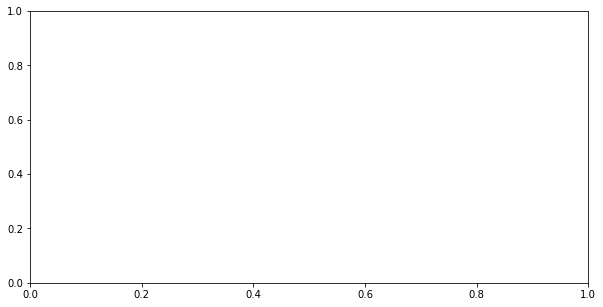

In [218]:
# TODO allow set order of channels as marker_dict
scplot = plot_mean_intensity(comb_adata, groupby='cluster', dendrogram=True, layer='zscored', vmin=-4, vmax=4, 
    limit_to_groups={'cluster': ['0','1','2','3','4','5','6','7','8']}, cmap='bwr')

In [219]:
# TODO: test dotplots!
# TODO put in script

Signature:
scplot.add_totals(
    show: Optional[bool] = True,
    sort: Literal['ascending', 'descending'] = None,
    size: Optional[float] = 0.8,
    color: Union[str, Tuple[float, ...], Sequence[Union[str, Tuple[float, ...]]], NoneType] = None,
)
Docstring:
Show barplot for the number of cells in in `groupby` category.

The barplot is by default shown on the right side of the plot or on top
if the axes are swapped.


Parameters
----------
show
    Boolean to turn on (True) or off (False) 'add_totals'
sort
    Set to either 'ascending' or 'descending' to reorder the categories
    by cell number
size
    size of the barplot. Corresponds to width when shown on
    the right of the plot, or height when shown on top. The unit is the same
    as in matplotlib (inches).
color
    Color for the bar plots or list of colors for each of the bar plots.
    By default, each bar plot uses the colors assigned in
    `adata.uns[{groupby}_colors]`.


Returns
-------
BasePlot


Examples
--------
>>

In [209]:
# zscore adata
def zscore(adata, key_added='zscored', limit_to_groups={}):
    """
    scale adata based on values in cluster "all".
    can subset adata to perturbation before calculating mean intensities (i.e. reference perturbation)
    adds 
        adata.layers[key_added]
        adata.var['mean_intensity'], adata.var['std_intensity']
    """
    cur_adata = adata[adata.obs['cluster']=='all']
    for key, val in limit_to_groups.items():
        cur_adata = cur_adata[cur_adata.obs[key]==val]
    # mean intensity per channel
    mean_intensity = (cur_adata.X * cur_adata.obs['size'][:, np.newaxis]).sum(axis=0) / cur_adata.obs['size'].sum()
    # std per channel
    std = np.sqrt(((cur_adata.X - mean_intensity)**2).mean(axis=0))
    # scale values
    adata.layers[key_added] = (adata.X - mean_intensity) / std
    adata.var['mean_intensity'] = mean_intensity
    adata.var['std_intensity'] = std

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import pandas as pd
#from pelkmans.mpp_data import MPPData
import scipy
import os
import warnings
#from statsmodels.tools.sm_exceptions import ConvergenceWarning

def _adjust_plotheight(scplot):
    """
    fig large gap between title and plot for scanpy plots 
    (rather hacky, might not work in all cases)
    """
    # modified code from sc.pl.MatrixPlot.make_figure
    category_height = scplot.DEFAULT_CATEGORY_HEIGHT
    category_width = scplot.DEFAULT_CATEGORY_WIDTH
    mainplot_height = len(scplot.categories) * category_height
    mainplot_width = (
        len(scplot.var_names) * category_width + scplot.group_extra_size
    )
    if scplot.are_axes_swapped:
        mainplot_height, mainplot_width = mainplot_width, mainplot_height

    height = mainplot_height #+ 1  # +1 for labels

    # if the number of categories is small use
    # a larger height, otherwise the legends do not fit
    scplot.height = max([scplot.min_figure_height, height])
    scplot.width = mainplot_width + scplot.legends_width
    
def _ensure_categorical(adata, col):
    if isinstance(adata.obs[col].dtype, pd.CategoricalDtype):
        # nothing todo
        return
    adata.obs[col] = adata.obs[col].astype(str).astype('category')
    return
    
# TODO add group size similar to dotplot here!
def plot_mean_intensity(adata, groupby='cluster', marker_dict=None, save=None, dendrogram=False, 
                               limit_to_groups={}, layer=None, type='matrixplot',
                               cmap='viridis', adjust_height=True,
                               figsize=(10,5), ax=None, **kwargs):
    """
    show per cluster intensity of each channel.
    intensity is either shown as mean or z-scored intensity
    """
    if layer == 'zscored' and 'zscored' not in adata.layers.keys():
        print('Compute adata.layers[zscored] first!')
        return
    _ensure_categorical(adata, groupby)
    
    # subset data
    for key, groups in limit_to_groups.items():
        if not isinstance(groups, list):
            groups = [groups]
        adata = adata[adata.obs[key].isin(groups)]
    # group vars together?
    if marker_dict is None:
        marker_dict = np.array(adata.var.index)
    if isinstance(marker_dict, dict):
        marker_list = np.concatenate(list(marker_dict.values()))
    else:
        marker_list = marker_dict
    
    # calculate values to show
    color_values = pd.DataFrame(index=adata.var.index)
    for g in adata.obs[groupby].cat.categories:
        if layer == None:
            color = 'mean intensity'
            g_expr = adata[adata.obs[groupby]==g].X
        elif layer == 'zscored':
            color = 'mean zscore'
            g_expr = adata[adata.obs[groupby]==g].layers['zscored']
        else:
            raise NotImplementedError(layer)
        g_size = adata[adata.obs[groupby]==g].obs['size']
        color_values[g] = (g_expr * g_size[:, np.newaxis]).sum(axis=0) / g_size.sum()
    color_values = color_values.loc[marker_list]
    
    # plot
    if dendrogram:
        sc.tl.dendrogram(adata, groupby=groupby)
    title = 'mean intensity in ' + ', '.join([f'{key}: {val}' for key, val in limit_to_groups.items()])
    if limit_to_groups == {}:
        title = 'mean intensity'
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
    
    if type == 'violinplot':
        scplot = sc.pl.stacked_violin(adata, var_names=marker_dict, groupby=groupby, #standard_scale='var', 
                         ax=ax, dendrogram=dendrogram, layer=layer, return_fig=True, title=title, **kwargs)
    elif type == 'matrixplot':
        scplot = sc.pl.matrixplot(adata, var_names=marker_dict, layer=layer, groupby=groupby, 
                         cmap=cmap, 
                        colorbar_title=color, ax=ax, 
                         return_fig=True, dendrogram=dendrogram, values_df=color_values.T, title=title, **kwargs)
    else:
        raise NotImplementedError(type)
    
    if adjust_height:
        _adjust_plotheight(scplot)
    return scplot
    #scplot.make_figure()
    # add axis labels
    #scplot.ax_dict['mainplot_ax'].set_xlabel('channels')
    #scplot.ax_dict['mainplot_ax'].set_ylabel(groupby)
    
    if save is not None:
        plt.savefig(save, dpi=100)

In [86]:
# TODO: save, add spatial co-occ
# TODO: re-write dotplot fns
import scanpy as sc

In [87]:
sc.pl.heatmap(adata, )

Signature:
sc.pl.heatmap(
    adata: anndata._core.anndata.AnnData,
    var_names: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]],
    groupby: Union[str, Sequence[str]],
    use_raw: Optional[bool] = None,
    log: bool = False,
    num_categories: int = 7,
    dendrogram: Union[bool, str] = False,
    gene_symbols: Optional[str] = None,
    var_group_positions: Optional[Sequence[Tuple[int, int]]] = None,
    var_group_labels: Optional[Sequence[str]] = None,
    var_group_rotation: Optional[float] = None,
    layer: Optional[str] = None,
    standard_scale: Optional[Literal['var', 'obs']] = None,
    swap_axes: bool = False,
    show_gene_labels: Optional[bool] = None,
    show: Optional[bool] = None,
    save: Union[str, bool, NoneType] = None,
    figsize: Optional[Tuple[float, float]] = None,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    vcenter: Optional[float] = None,
    norm: Optional[matplotlib.colors.Normalize] = None,
    **kwds,

In [202]:


 def save_agg_data(self, num_clusters=None, clustering=None):
        """
        save a #mapobject_ids x #channels x #clusters matrix containing mean protein intensities
        additionally save a #mapobject_ids x #clusters matrix containing the size of each cluster
        """
        if clustering is None:
            clustering_ = ""
        else:
            clustering_ = f"{clustering}/"
        for well in self.well_names:
            mpp_data = MPPData.from_data_dir(os.path.join(self.save_dir, well))
            cluster_ids = np.load(os.path.join(self.save_dir, well, f'{clustering_}cluster_ids.npy'))
            mapobject_ids = pd.DataFrame(mpp_data.metadata['mapobject_id'])
            self.log.info(f'Calculating aggregated data from {well}')
            df = pd.DataFrame(data=mpp_data.center_mpp, columns=list(mpp_data.channels.name), 
                             index=mpp_data.mapobject_ids)
            if num_clusters is None:
                num_clusters = max(cluster_ids)+1
            agg_data = np.zeros((len(mapobject_ids), df.shape[1], num_clusters))
            size_data = np.zeros((len(mapobject_ids), num_clusters))

            for c in range(num_clusters):
                idx = np.where(cluster_ids == c)[0]
                cur_df = df.iloc[idx]
                grouped = cur_df.groupby(cur_df.index)
                agg = grouped.mean()
                size = pd.DataFrame(grouped[list(df.columns)[0]].count())
                # make sure that size and agg have right ordering of mapobject ids as index
                agg = pd.merge(agg, mapobject_ids, how='right', left_index=True, right_on='mapobject_id').set_index('mapobject_id').fillna(0)
                size = pd.merge(size, mapobject_ids, how='right', left_index=True, right_on='mapobject_id').set_index('mapobject_id').fillna(0)
                # put in np arrays
                agg_data[:,:,c] = np.array(agg)
                size_data[:,c] =np.array(size)[:,0]
            # save agg_data and size_data
            np.save(os.path.join(self.save_dir, well, f'{clustering_}mean_intensity_per_cluster.npy'), agg_data)
            np.save(os.path.join(self.save_dir, well, f'{clustering_}size_per_cluster.npy'), size_data)

IndentationError: unexpected indent (732116348.py, line 12)

In [ ]:
  if clustering is None:
            clustering_ = ""
        else:
            clustering_ = f"{clustering}/"
                
        adatas = {}
        for well in self.well_names:
            if not os.path.exists(os.path.join(self.save_dir, well, clustering_)):
                os.makedirs(os.path.join(self.save_dir, well, clustering_))
            agg_data = np.load(os.path.join(self.save_dir, well, f'{clustering_}mean_intensity_per_cluster.npy'))
            agg_size = np.load(os.path.join(self.save_dir, well, f'{clustering_}size_per_cluster.npy'))
            channels = pd.read_csv(os.path.join(self.save_dir, well, 'channels.csv'), header=None)
            metadata = pd.read_csv(os.path.join(self.save_dir, well, 'metadata.csv'), index_col=0)
            cell_cycle = pd.read_csv(self.dataset_params['cell_cycle_file'])
            metadata = metadata.merge(cell_cycle, left_on='mapobject_id_cell', right_on='mapobject_id', 
                                      how='left', suffixes=('','_cc')).fillna('other')
            metadata = metadata.astype('category')
            wells = pd.read_csv(self.wells_metadata_file, index_col=0)
            metadata = metadata.merge(wells, left_on='well_name', right_on='name', how='left')

            if cluster_mapping_file is not None:
                # read cluster mapping from file or use passed list
                if isinstance(cluster_mapping_file, str):
                    cluster_mapping = pd.read_csv(os.path.join(self.save_dir, cluster_mapping_file), index_col=0)[cluster_mapping_col]
                else:
                    cluster_mapping = np.array(cluster_mapping_file)
                counts = agg_data * agg_size[:, np.newaxis, :]
                for output_cl in np.unique(cluster_mapping):
                    idxs = np.where(cluster_mapping == output_cl)[0]
                    res_counts = np.sum(counts[:, :, idxs], axis=-1)
                    res_counts = res_counts / np.sum(agg_size[:, np.newaxis, idxs], axis=-1)
                    res_counts = np.nan_to_num(res_counts)

                    cur_adata = ad.AnnData(res_counts, obs=metadata, var=channels.set_index(1))
                    cur_adata.obs['size'] = np.sum(agg_size[:, idxs], axis=-1)
                    if output_cl in adatas:
                        adatas[output_cl] = ad.concat([adatas[output_cl], cur_adata], index_unique='-')
                        #adatas[output_cl].obs.reset_index()
                    else:
                        adatas[output_cl] = cur_adata
            else:
                for cl in range(0, agg_data.shape[-1]):
                    cur_adata = ad.AnnData(agg_data[:,:,cl], obs=metadata, var=channels.set_index(1))
                    cur_adata.obs['size'] = agg_size[:, cl]
                    if cl in adatas:
                        adatas[cl] = ad.concat([adatas[cl], cur_adata], index_unique='-')
                        #adatas[cl].obs.reset_index()
                    else:
                        adatas[cl] = cur_adata

        return adatas

In [ ]:
def co_occurrence(adata, interval, cluster_id='cluster_id'):
    """
    co occurrence
    returns co_occ, mapobject_ids, well_name
    """
    # calculate neighborhood enrichment for each cell individually
    co_occs = []
    mapobject_ids = []
    well_name = []
    
    log.info(f'calculating co-occurrence for intervals {interval} and clustering {cluster_id}')
    num_clusters = len(adata.obs[cluster_id].cat.categories)
    cluster_names = {n: i for i,n in enumerate(adata.obs[cluster_id].cat.categories)}
    for mapobject_id in np.unique(adata.obs.mapobject_id):
        adata_cell = adata[adata.obs.mapobject_id == mapobject_id].copy()
        log.info(f'co-occurrence for {mapobject_id}, with shape {adata_cell.shape}')
        cur_co_occ, cur_interval = sq.gr.co_occurrence(
            adata_cell,
            cluster_key=cluster_id,
            spatial_key='coords',
            interval=interval,
            copy=True, show_progress_bar=False,
        )
        co_occ = np.zeros((num_clusters,num_clusters,len(interval)-1))
        cur_clusters = np.vectorize(cluster_names.__getitem__)(np.array(adata_cell.obs[cluster_id].cat.categories))
        grid = np.meshgrid(cur_clusters, cur_clusters)
        co_occ[grid[0].flat, grid[1].flat] = cur_co_occ.reshape(-1, len(interval)-1)
        co_occs.append(co_occ.copy())

        mapobject_ids.append(mapobject_id)
        well_name.append(adata_cell.obs['well_name'][0])
        
    comb_co_occs = np.array(co_occs)
    # replace nan with 0 and inf with max value
    max_co_occ = np.nan_to_num(comb_co_occs, posinf=0).max()
    comb_co_occs = np.nan_to_num(comb_co_occs, posinf=max_co_occ)
    
    return comb_co_occs, mapobject_ids, well_name